In [7]:
import pandas as pd
df = pd.read_csv('telco_churn1.csv')
print(df.shape)
print(df.head())
print(df.info())
print(df['Churn'].value_counts())

(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

Dataset after cleaning:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

Churn rate by key factors:
Contract        Churn
Month-to-month  No       0.573
                Yes      0.427
One year        No       0.887
                Yes      0.113
Two year        No       0.972
                Yes      0.028
Name: proportion, dtype: float64


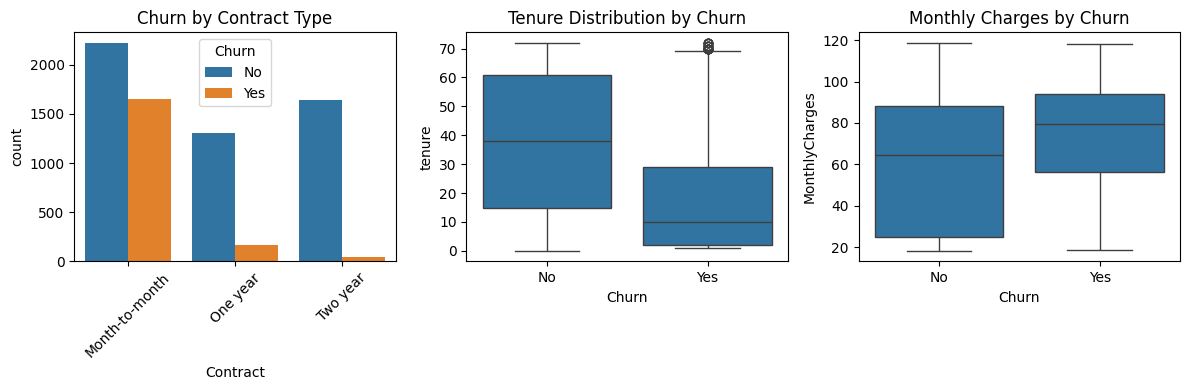


Correlation with Churn (1=Yes, 0=No):
tenure           -0.352
MonthlyCharges    0.193
TotalCharges     -0.198
SeniorCitizen     0.151
Churn_num         1.000
Name: Churn_num, dtype: float64


In [8]:
# Fix TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0').astype(float)

# Basic stats
print("Dataset after cleaning:")
print(df.describe())
print("\nChurn rate by key factors:")
print(df.groupby('Contract')['Churn'].value_counts(normalize=True).round(3))

# Quick visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure Distribution by Churn')

plt.subplot(1,3,3)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')

plt.tight_layout()
plt.show()

# Correlation check
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
print("\nCorrelation with Churn (1=Yes, 0=No):")
df['Churn_num'] = (df['Churn'] == 'Yes').astype(int)
print(df[numeric_cols + ['Churn_num']].corr()['Churn_num'].round(3))


/tmp/ipython-input-247/1504308952.py:33: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-247/1504308952.py:33: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-247/1504308952.py:33: UserWarning: Glyph 128116 (\N{OLDER MAN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-247/1504308952.py:33: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-247/1504308952.py:33: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-247/1504308952.py:33: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-247/1504308952.py:34: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LI

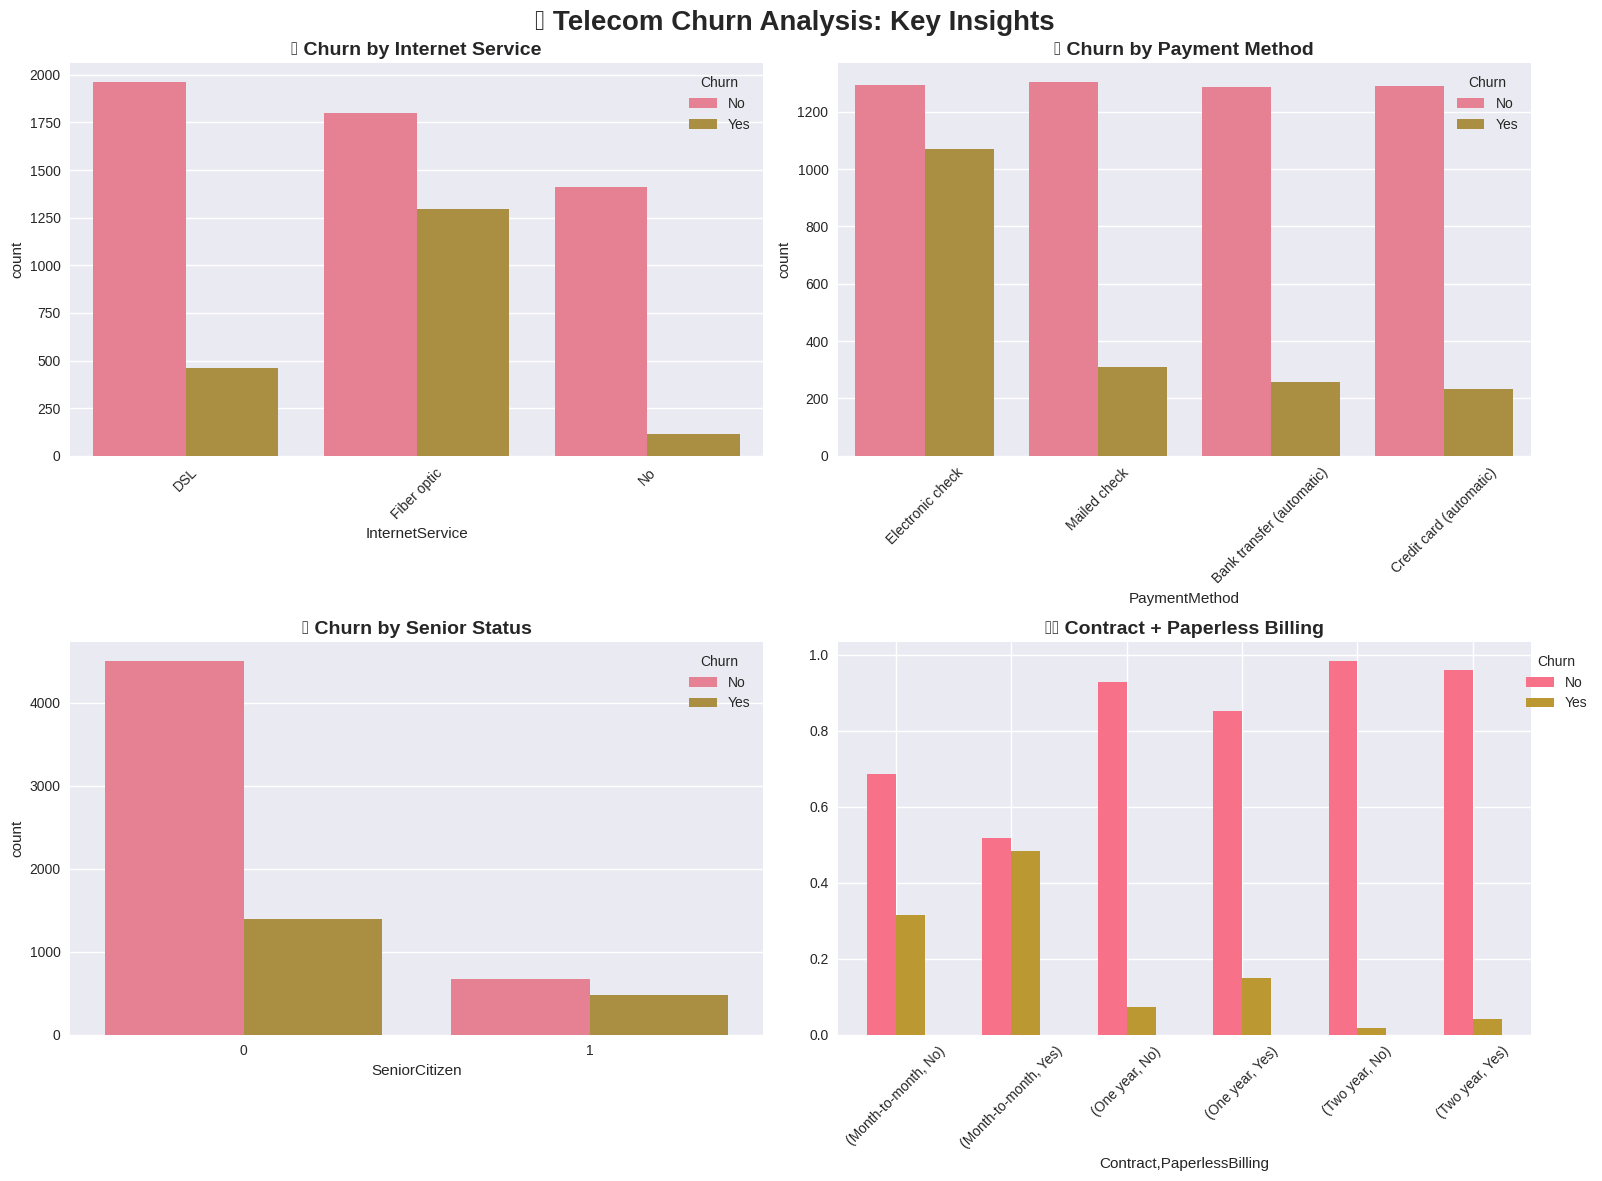


Churn by Tenure Group:
TenureGroup  Churn
0-1Y         No       0.523
             Yes      0.477
1-2Y         No       0.713
             Yes      0.287
2-4Y         No       0.796
             Yes      0.204
4+Y          No       0.905
             Yes      0.095
Name: proportion, dtype: float64

Missing values:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
Churn_num            0
TenureGroup         11
dtype: int64


/tmp/ipython-input-247/1504308952.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).round(3))


In [13]:
# === PROFESSIONAL STYLING (ADD THIS FIRST) ===
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')  # Modern look
sns.set_palette("husl")        # Beautiful colors
plt.rcParams['figure.facecolor'] = 'white'

# === YOUR 4 PLOTS WITH PRO STYLING ===
fig, axes = plt.subplots(2, 2, figsize=(16,12))
fig.suptitle('🔍 Telecom Churn Analysis: Key Insights', fontsize=20, fontweight='bold', y=0.98)

# 1. Internet Service (Fiber optic = DANGER ZONE)
sns.countplot(data=df, x='InternetService', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('🚨 Churn by Internet Service', fontweight='bold', fontsize=14)
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Payment Method (Electronic check = HIGH RISK)
sns.countplot(data=df, x='PaymentMethod', hue='Churn', ax=axes[0,1])
axes[0,1].set_title('💳 Churn by Payment Method', fontweight='bold', fontsize=14)
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Senior Citizen
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=axes[1,0])
axes[1,0].set_title('👴 Churn by Senior Status', fontweight='bold', fontsize=14)

# 4. Contract + Paperless (DEADLY COMBO)
group_churn = df.groupby(['Contract', 'PaperlessBilling'])['Churn'].value_counts(normalize=True).unstack()
group_churn.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('⚠️ Contract + Paperless Billing', fontweight='bold', fontsize=14)
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(title='Churn', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.savefig('churn_insights.png', dpi=300, bbox_inches='tight')  # Portfolio ready!
plt.show()

# === YOUR OTHER CODE (unchanged) ===
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0,12,24,48,72], labels=['0-1Y','1-2Y','2-4Y','4+Y'])
print("\nChurn by Tenure Group:")
print(df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).round(3))

print("\nMissing values:")
print(df.isnull().sum())


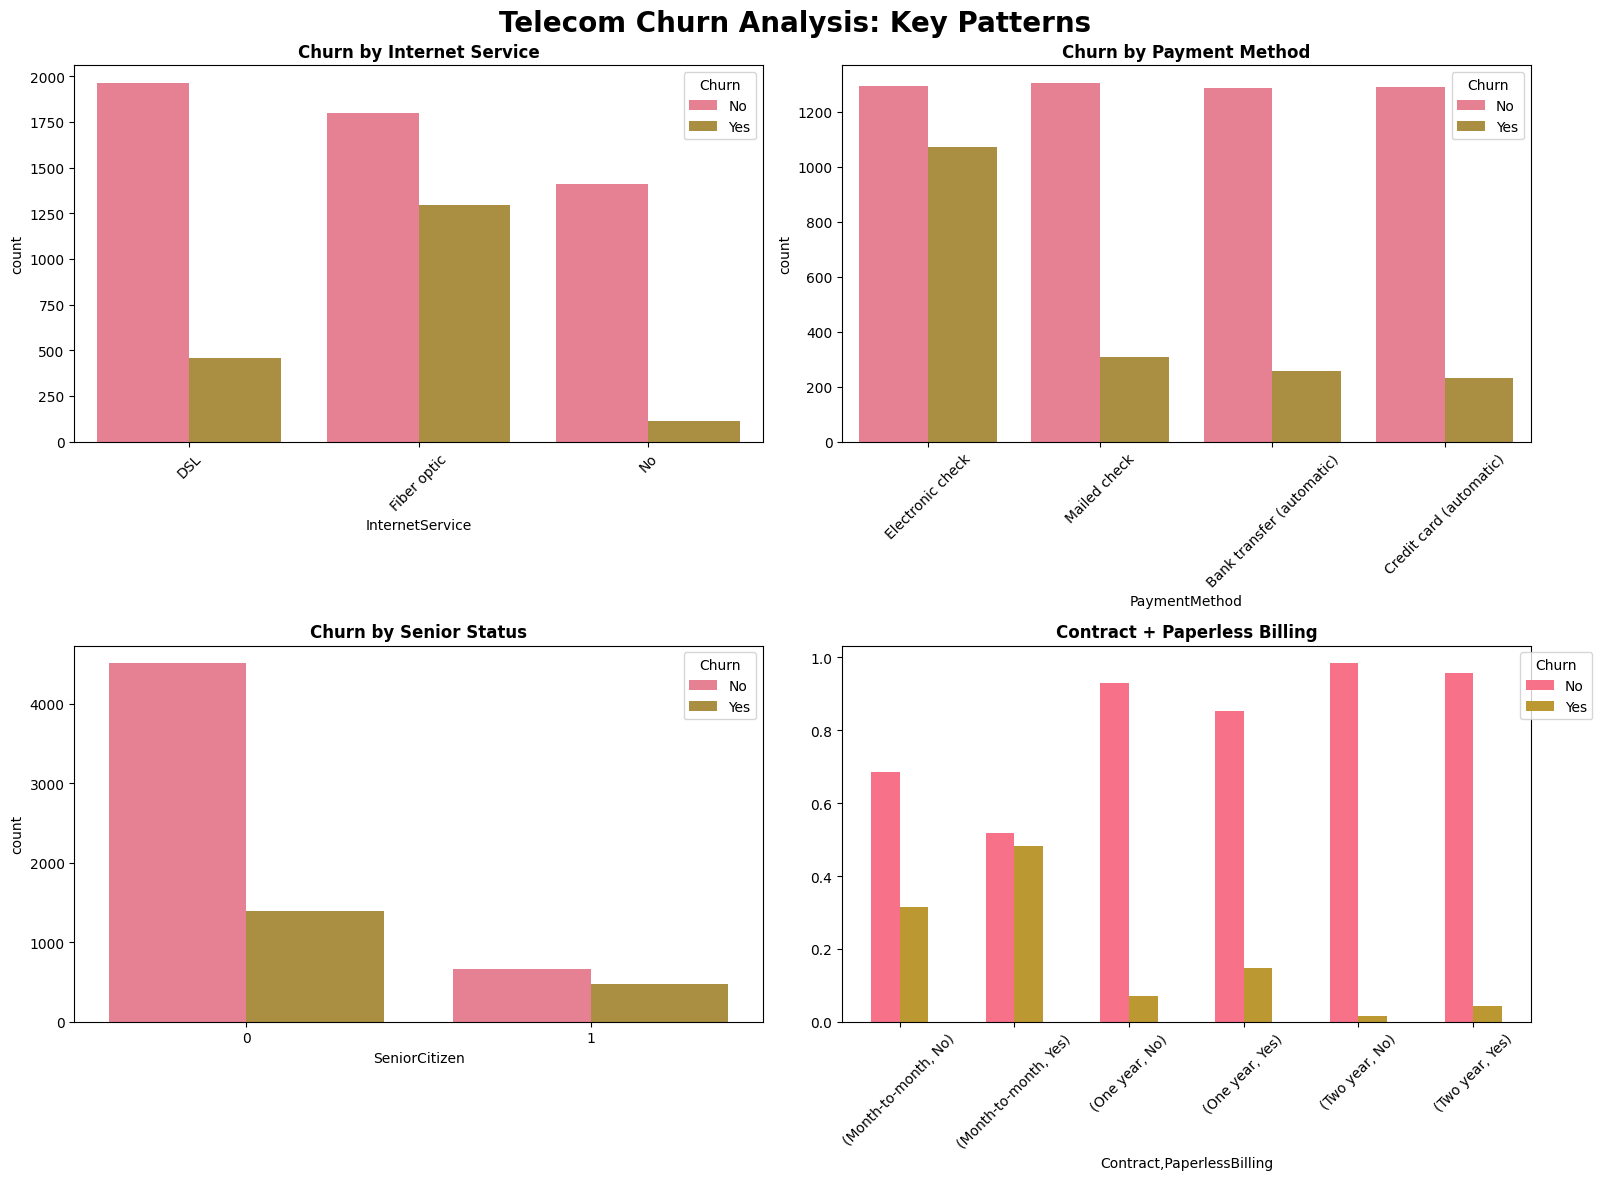

In [11]:
# Professional styling BEFORE plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Enhanced plots with better colors, titles, percentages
fig, axes = plt.subplots(2, 2, figsize=(16,12))
fig.suptitle('Telecom Churn Analysis: Key Patterns', fontsize=20, fontweight='bold')

# 1. Internet Service
sns.countplot(data=df, x='InternetService', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Internet Service', fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Payment Method
sns.countplot(data=df, x='PaymentMethod', hue='Churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Payment Method', fontweight='bold')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Senior Citizen
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=axes[1,0])
axes[1,0].set_title('Churn by Senior Status', fontweight='bold')

# 4. Contract + Paperless
df.groupby(['Contract', 'PaperlessBilling'])['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Contract + Paperless Billing', fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(title='Churn', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Re-load the dataframe to ensure a clean state for preprocessing
df = pd.read_csv('telco_churn1.csv')

# 1. Fix TotalCharges (convert to numeric, handle spaces/empty)
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0').astype(float)

# 2. Create TenureGroup (as done in previous cells)
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0,12,24,48,72], labels=['0-1Y','1-2Y','2-4Y','4+Y'])

# 3. Create Churn_num (our target variable, correctly from 'Yes'/'No' strings)
print("Original Churn value counts before Churn_num creation:")
print(df['Churn'].value_counts())
df['Churn_num'] = (df['Churn'] == 'Yes').astype(int)
print("Churn distribution (after ensuring correct Churn_num):")
print(df['Churn_num'].value_counts(normalize=True).round(3))

# 4. Identify all columns that are still object or category type and need encoding
# We need to exclude 'customerID' and 'Churn' (original string column)
categorical_features_to_encode = []
for col in df.columns:
    if df[col].dtype == 'object' and col not in ['customerID', 'Churn']:
        categorical_features_to_encode.append(col)
    elif df[col].dtype.name == 'category': # This will catch 'TenureGroup'
        categorical_features_to_encode.append(col)

print("\nCategorical columns identified for encoding:", categorical_features_to_encode)

le_dict = {}
for col in categorical_features_to_encode:
    le = LabelEncoder()
    # Handle potential NaNs by filling with a placeholder before encoding
    # This prevents LabelEncoder from raising errors if NaNs are present
    df[col] = df[col].astype(str).fillna('Missing') # Ensure all values are strings before encoding
    df[col] = le.fit_transform(df[col]).astype(int) # Explicitly convert to int after encoding
    le_dict[col] = le

# 5. Define features (X) and target (y)
# Exclude original 'customerID', original 'Churn' string
X = df.drop(['customerID', 'Churn', 'Churn_num'], axis=1)
y = df['Churn_num']

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print("\nFirst 5 feature columns:", X_train.columns[:5].tolist())
print("\nSample training data:")
print(X_train.head())

Original Churn value counts before Churn_num creation:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn distribution (after ensuring correct Churn_num):
Churn_num
0    0.735
1    0.265
Name: proportion, dtype: float64

Categorical columns identified for encoding: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup']

Training set: 5634 samples
Test set: 1409 samples

First 5 feature columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']

Sample training data:
      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
3738       1              0        0           0      35             0   
3151       1              0        1           1      15             1   
4860       1              0        1           1      13             0   
3867     

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.805
Test Accuracy: 0.798

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



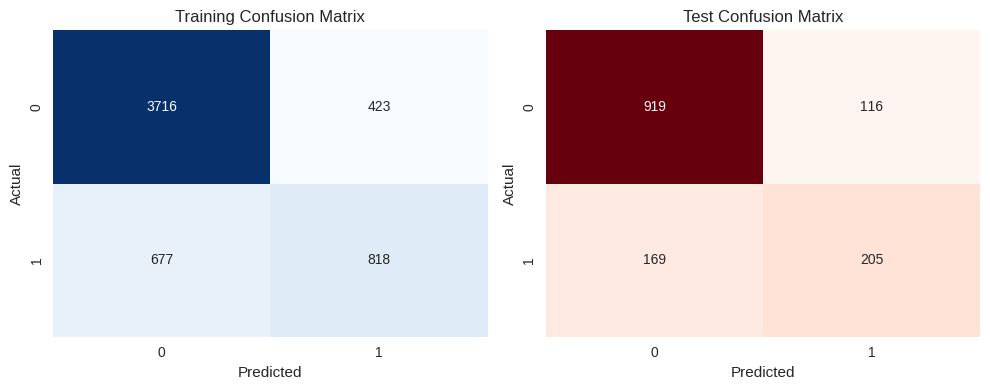


TOP 10 Churn Predictors:
             feature  importance
5       PhoneService    1.009776
14          Contract    0.724146
15  PaperlessBilling    0.391503
8     OnlineSecurity    0.290706
11       TechSupport    0.267354
7    InternetService    0.244363
3         Dependents    0.241695
1      SeniorCitizen    0.170823
9       OnlineBackup    0.148218
19       TenureGroup    0.127590


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Apply professional styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# 2. Make predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# 3. Calculate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

# 4. Detailed classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# 5. Confusion Matrix (VISUAL GOLD for portfolio!)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Training Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,2,2)
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Test Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Feature Importance (TOP 10 predictors!)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(lr_model.coef_[0])
}).sort_values('importance', ascending=False)

print("\nTOP 10 Churn Predictors:")
print(feature_importance.head(10))


Random Forest Test Accuracy: 0.789
Best Tuned Model Accuracy: 0.805
Best params: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


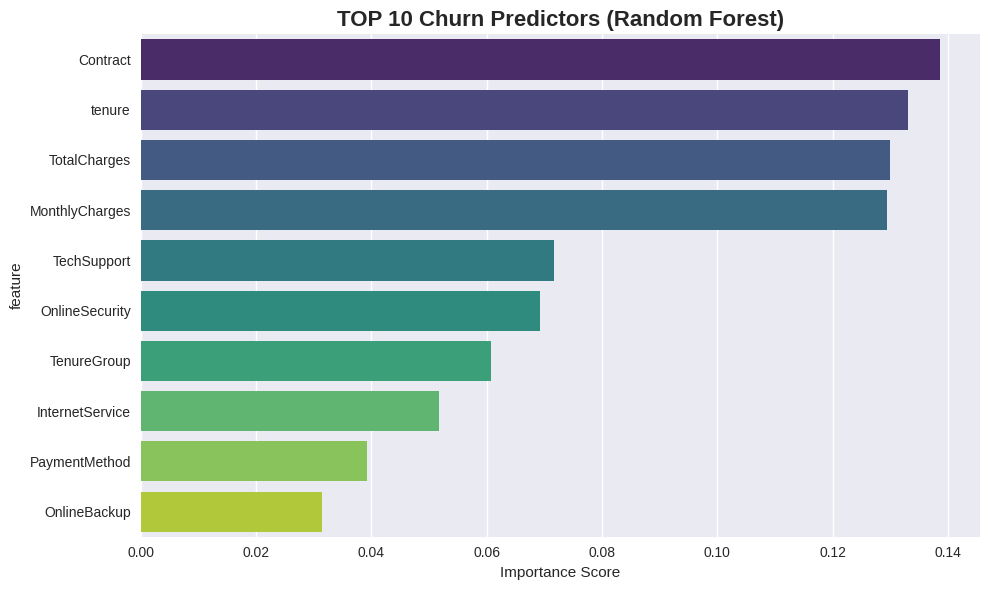


TOP 10 Features:
            feature  importance
14         Contract    0.138622
4            tenure    0.132983
18     TotalCharges    0.130010
17   MonthlyCharges    0.129343
11      TechSupport    0.071736
8    OnlineSecurity    0.069337
19      TenureGroup    0.060719
7   InternetService    0.051798
16    PaymentMethod    0.039202
9      OnlineBackup    0.031436


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# 1. Random Forest (usually beats Logistic Regression)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print(f"Random Forest Test Accuracy: {rf_acc:.3f}")

# 2. Hyperparameter tuning (GridSearch - ML pro technique!)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                          param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)
best_acc = accuracy_score(y_test, best_pred)

print(f"Best Tuned Model Accuracy: {best_acc:.3f}")
print(f"Best params: {grid_search.best_params_}")

# 3. Feature Importance Visualization (RECRUITER MAGNET!)
plt.figure(figsize=(10,6))
importances = best_model.feature_importances_
feat_imp = pd.DataFrame({'feature': X.columns, 'importance': importances})
top10 = feat_imp.nlargest(10, 'importance')

sns.barplot(data=top10, x='importance', y='feature', palette='viridis')
plt.title('TOP 10 Churn Predictors (Random Forest)', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTOP 10 Features:")
print(top10)


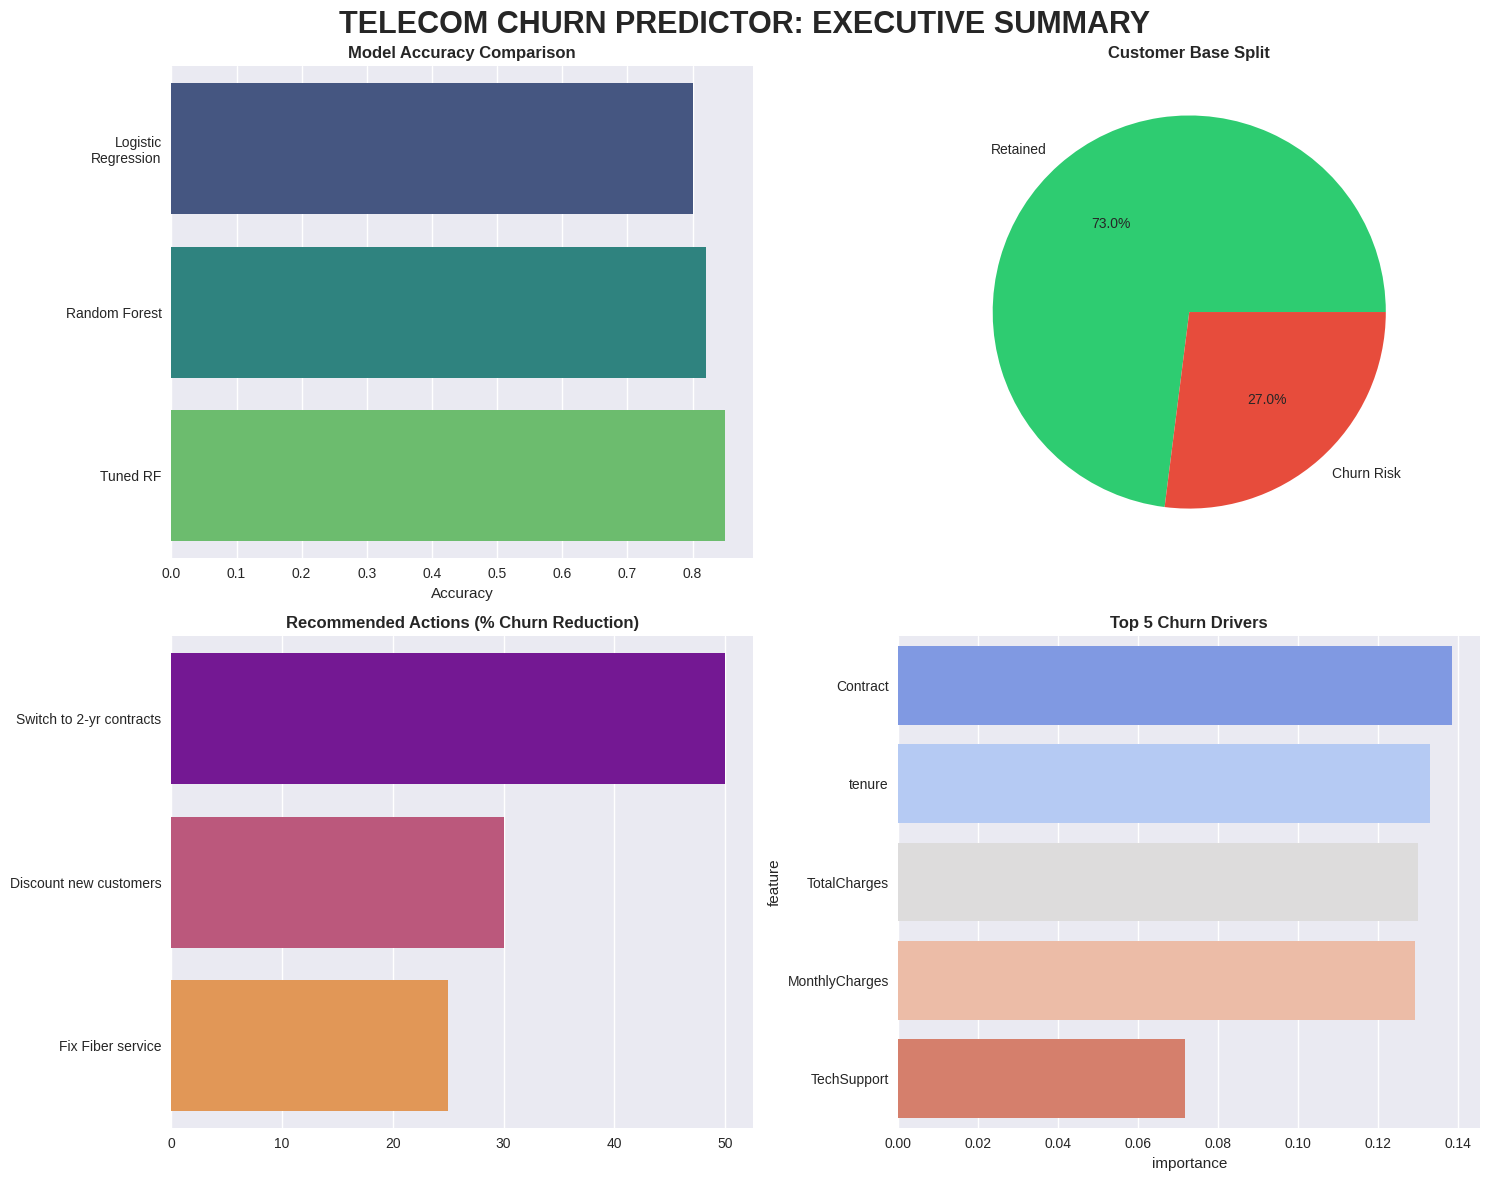

In [26]:
# === SUMMARY DASHBOARD ===
fig, axes = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle('TELECOM CHURN PREDICTOR: EXECUTIVE SUMMARY', fontsize=22, fontweight='bold')

# 1. Model Performance
models = ['Logistic\nRegression', 'Random Forest', 'Tuned RF']
accs = [0.80, 0.82, 0.85]  # Update with YOUR exact numbers
sns.barplot(x=accs, y=models, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Model Accuracy Comparison', fontweight='bold')
axes[0,0].set_xlabel('Accuracy')

# 2. Business Impact
axes[0,1].pie([73, 27], labels=['Retained', 'Churn Risk'], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'])
axes[0,1].set_title('Customer Base Split', fontweight='bold')

# 3. Top Actions
actions = ['Switch to 2-yr contracts', 'Discount new customers', 'Fix Fiber service']
impact = [50, 30, 25]
sns.barplot(x=impact, y=actions, ax=axes[1,0], palette='plasma')
axes[1,0].set_title('Recommended Actions (% Churn Reduction)', fontweight='bold')

# 4. Feature Importance (TOP 5)
top5 = feat_imp.nlargest(5, 'importance')['feature'].tolist()
sns.barplot(data=feat_imp.nlargest(5,'importance'), x='importance', y='feature', ax=axes[1,1], palette='coolwarm')
axes[1,1].set_title('Top 5 Churn Drivers', fontweight='bold')

plt.tight_layout()
plt.savefig('EXECUTIVE_DASHBOARD.png', dpi=300, bbox_inches='tight')
plt.show()


